In [304]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [312]:
dataset = "pets"
record_list = []
data_list = []
for file in os.walk(".\\"):
    results = [f for f in file[2] if ".npy" in f]
    if results != []:
        directory = file[0]
        for result in results:
            if dataset in result:
                data_list.append(np.load(directory+"\\"+result))
                record_list.append(directory+"\\"+result)

In [313]:
columns = [i.split("\\")[-1][:-4] for i in record_list]

In [314]:
largest_record = max(map(lambda x:len(x),data_list))

In [315]:
df = pd.DataFrame(columns=columns)

In [316]:
for count,record in enumerate(record_list):
    data = np.load(record)
    df.iloc[:,count] = np.pad(data,(0,largest_record-len(data)),"constant")

In [317]:
df = df.replace({0:np.nan})

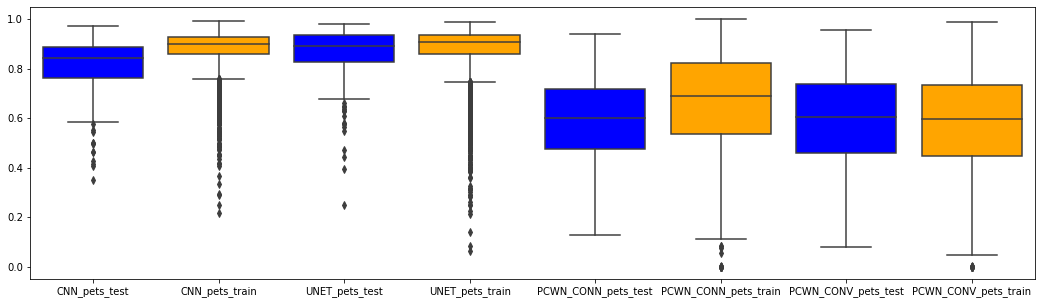

In [318]:
plt.rcParams["figure.figsize"] = (18,5)
ax = sns.boxplot(data=df)

for i in range(0,len(df.columns),2) :
    ax.artists[i].set_facecolor('blue')
    ax.artists[i+1].set_facecolor('orange')

In [303]:
df.describe()

,CNN_birds_test,CNN_birds_train,UNET_birds_test,UNET_birds_train,PCWN_CONV_birds_test,PCWN_CONV_birds_train,PCWN_CONN_birds_test,PCWN_CONN_birds_train
count,300.000000,5.733000e+03,300.000000,5.733000e+03,300.000000,5733.000000,300.000000,5733.000000
mean,0.687906,7.471481e-01,0.697616,7.136916e-01,0.334936,0.646047,0.171166,0.163264
std,0.185481,1.598325e-01,0.191609,1.791282e-01,0.169154,0.213386,0.204298,0.200384
min,0.000417,9.818260e-29,0.042544,9.270577e-32,0.000551,0.000760,0.000122,0.000078
25%,0.602411,6.924262e-01,0.606107,6.246465e-01,0.202678,0.503411,0.000622,0.000616
50%,0.742106,7.963290e-01,0.751156,7.649401e-01,0.324988,0.690816,0.067855,0.054971
75%,0.822264,8.554875e-01,0.837897,8.468531e-01,0.445205,0.822026,0.322082,0.300081
max,0.924942,9.590497e-01,0.946121,9.687237e-01,0.799249,0.976290,0.780274,0.908799
